# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

#print(mouse_metadata.head())
#print(study_results.head())
merge_df = pd.merge(mouse_metadata, study_results, how= 'right')

# Display the data table for preview
merge_df = merge_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen',
                    'Sex', 'Age_months', 'Weight (g)']]
print(merge_df.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [2]:
# Checking the number of mice
total_mouse = len(merge_df["Mouse ID"].value_counts())
print("Total mouse id:", total_mouse)

Total mouse id: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice['Mouse ID'].unique())


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
all_duplicate_data = merge_df[merge_df["Mouse ID"].isin(duplicate_mice["Mouse ID"].unique())]

# Print the result
print("All data for the duplicate mice:", all_duplicate_data)



All data for the duplicate mice:      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989      

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].value_counts()
clean_mouse_count = len(clean_mouse_count)
print(f"Number of mice in the clean DataFrame: {clean_mouse_count}")


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [22]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


grouped_data = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_vol = grouped_data.mean()
#print(mean_vol)
median_vol = grouped_data.median()
#print(median_vol)
variance = grouped_data.var()
#print (variance)
st_dev = grouped_data.std()
#print (st_dev)
sem_vol = grouped_data.sem()
#print(sem_vol)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame ({ "Mean Tumor Volume" : mean_vol,
                               "Median Tumor Volume" : median_vol,
                               "Tumor volume varience" : variance,
                               "Tumor volume standard deviation" : st_dev,
                               "Tumor volume SEM" : sem_vol
    
})

# Assemble the resulting series into a single summary DataFrame.

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor volume varience,Tumor volume standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
grouped_data = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = pd.DataFrame ({ "Mean Tumor Volume" : mean_vol,
                               "Median Tumor Volume" : median_vol,
                               "Tumor volume varience" : variance,
                               "Tumor volume standard deviation" : st_dev,
                               "Tumor volume SEM" : sem_vol })
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor volume varience,Tumor volume standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

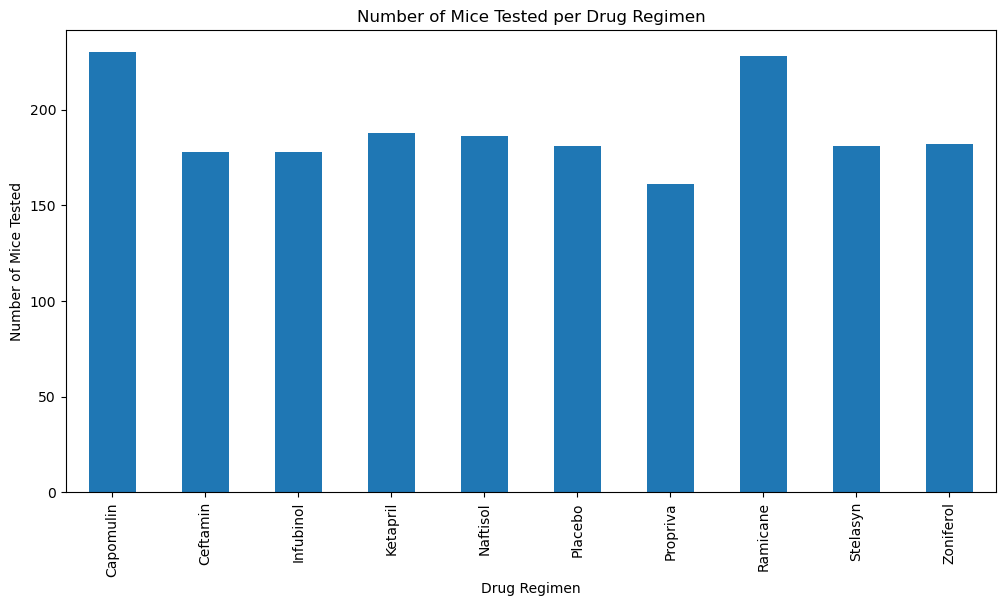

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_data = merge_df.groupby('Drug Regimen')["Mouse ID"].count()
grouped_data.plot(kind='bar', figsize=(12,6))
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


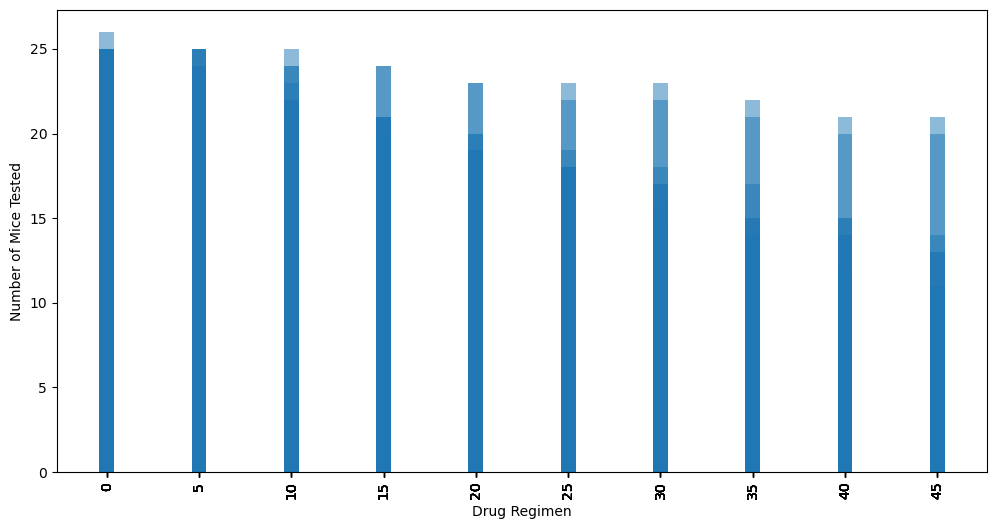

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
grouped_data =merge_df.groupby(['Drug Regimen', 'Timepoint'])['Mouse ID'].count().reset_index()

plt.figure(figsize=(12,6))

plt.bar(grouped_data['Timepoint'],grouped_data['Mouse ID'], alpha=0.5, align='center')
plt.xticks(grouped_data['Timepoint'], rotation ='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()


<AxesSubplot:ylabel='Sex'>

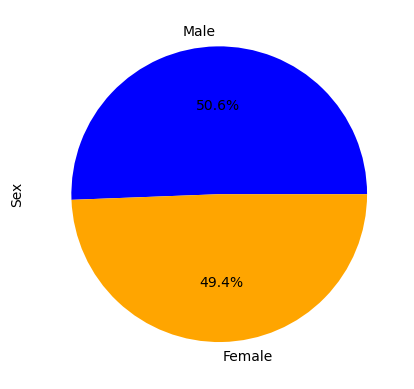

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = merge_df['Sex'].value_counts()
gender_count.plot(kind='pie',autopct="%1.1f%%",
labels = ["Male", "Female"],
colors = ['blue', 'orange'])

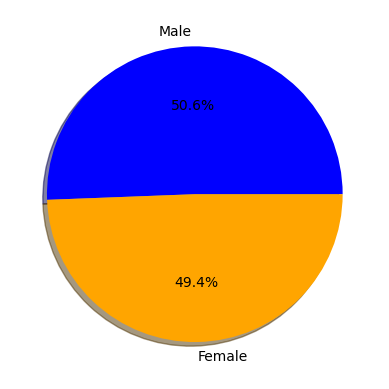

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = merge_df['Sex'].value_counts()
labels = ["Male", "Female"]
colors = ['blue', 'orange']
plt.pie(gender_count, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


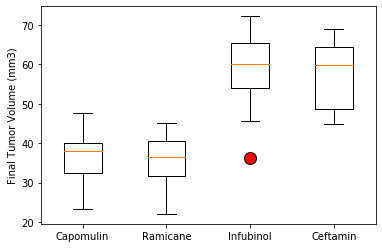

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

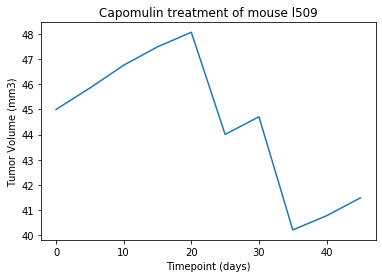

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



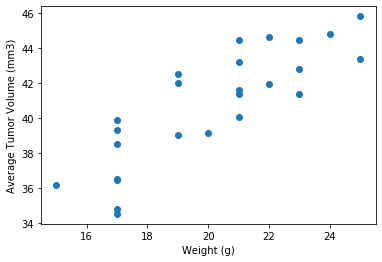

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


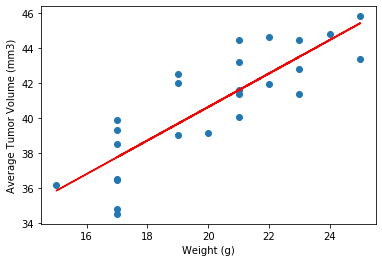

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

